In [1]:
# This ensures to use the source code if not installed as Python package
try:
    import rapidAligner
except:
    import os, sys
    sys.path.append(os.path.join(os.getcwd(),".."))

In [2]:
import rapidAligner as ra
import cupy as cp
import numpy as np
import pylab as pl

In [3]:
with ra.util.Timer("load data"):
    query, subject = ra.util.FakeSeriesGenerator(seed=42).data

elapsed time: 1049 ms (load data)


elapsed time: 414 ms (align sdist fft)
elapsed time: 302 ms (align sdist naive)
elapsed time: 3 ms (align sdist fft)
elapsed time: 30 ms (align sdist naive)
elapsed time: 3 ms (align sdist fft)
elapsed time: 29 ms (align sdist naive)


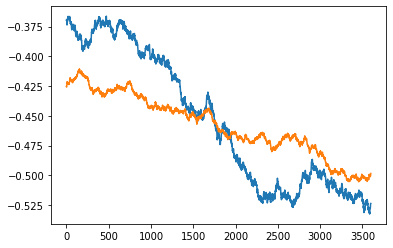

In [4]:
num_repeats = 3 # just to eliminate initial jit compiler overhead on first call
for _ in range(num_repeats):
    with ra.util.Timer("align sdist fft"):
        ying = ra.ED.sdist(query, subject, mode="fft")
    with ra.util.Timer("align sdist naive"):
        yang = ra.ED.sdist(query, subject, mode="naive")
        
assert(cp.allclose(ying, yang))

k = int(cp.argmin(yang))
pl.plot(query)
pl.plot(subject[k:k+len(query)])

elapsed time: 109 ms (align mdist fft)
elapsed time: 299 ms (align mdist naive)
elapsed time: 3 ms (align mdist fft)
elapsed time: 30 ms (align mdist naive)
elapsed time: 3 ms (align mdist fft)
elapsed time: 32 ms (align mdist naive)


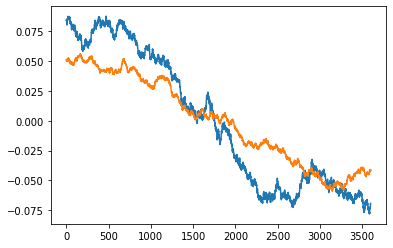

In [5]:
for _ in range(num_repeats):
    with ra.util.Timer("align mdist fft"):
        ying = ra.ED.mdist(query, subject, mode="fft")
    with ra.util.Timer("align mdist naive"):
        yang = ra.ED.mdist(query, subject, mode="naive")
assert(cp.allclose(ying, yang))

k = int(cp.argmin(yang))
mnorm = lambda x : x-np.mean(x)
pl.plot(mnorm(query))
pl.plot(mnorm(subject[k:k+len(query)]))

elapsed time: 546 ms (align zdist fft)
elapsed time: 314 ms (align zdist naive)
elapsed time: 4 ms (align zdist fft)
elapsed time: 36 ms (align zdist naive)
elapsed time: 3 ms (align zdist fft)
elapsed time: 35 ms (align zdist naive)


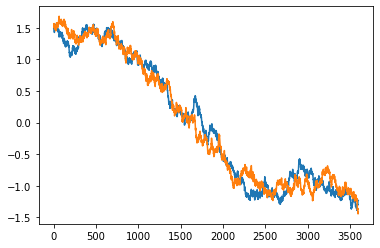

In [6]:
for _ in range(num_repeats):
    with ra.util.Timer("align zdist fft"):
        ying = ra.ED.zdist(query, subject, mode="fft")
    with ra.util.Timer("align zdist naive"):
        yang = ra.ED.zdist(query, subject, mode="naive")

assert(cp.allclose(ying, yang))
        
k = int(cp.argmin(yang))
znorm = lambda x : (x-np.mean(x))/np.std(x, ddof=0)
pl.plot(znorm(query))
pl.plot(znorm(subject[k:k+len(query)]))

In [7]:
dir(ra)

['ECGLoader',
 'ED',
 'FakeSeriesGenerator',
 'Loader',
 'Timer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'mdist',
 'sdist',
 'util',
 'zdist']